## Rendu du TP2

# Q1

In [6]:
import numpy as np
import math

def quadratic(A, b, x, order=0):
    tmp = 0.5*np.transpose(x)
    tmp = np.dot(tmp, A)
    tmp = np.dot(tmp, x)
    tmp -= np.dot(np.transpose(b), x)

    if (order==0):
        return tmp
    elif(order == 1):
        return tmp,(np.dot(A, x) - b)
    elif (order == 2):
        return tmp,(np.dot(A, x)-b),A
    else:
        return -1


# Q2

In [7]:
def rastrigin(x, order):
    n = len(x)
    s = 10*n
    p = math.pi
    for i in x:
        s+=i**2 - 10*np.cos(2*p*i)
    if (order==0):
        return s

    if (order==1):
        g = np.zeros(n)
        for i in range(n):
            g[i]=2*x[i]+20*p*np.sin(2*p*x[i])
        return (s,g)
    elif (order==2):
        g = np.zeros(n)
        h = np.zeros(n,n)
        for i in range(n):
            g[i]=2*x[i]+20*p*np.sin(2*p*x[i])
            h[i][i]=2+40*(p**2)*np.cos(2*p*x[i])
            return (s, g, h)
    else:
        return -1
        

# Q3

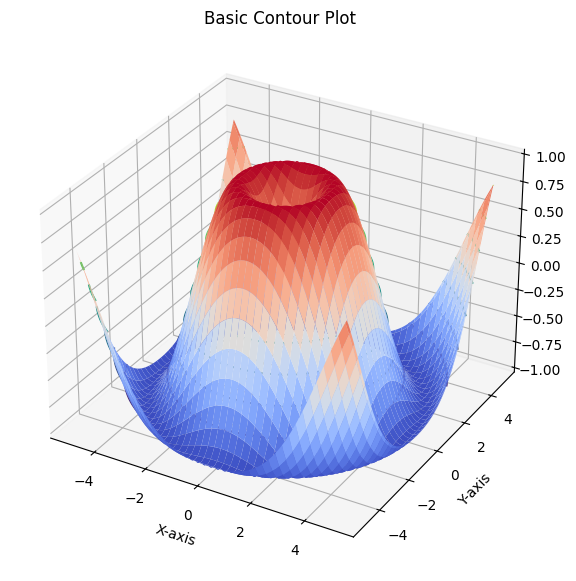

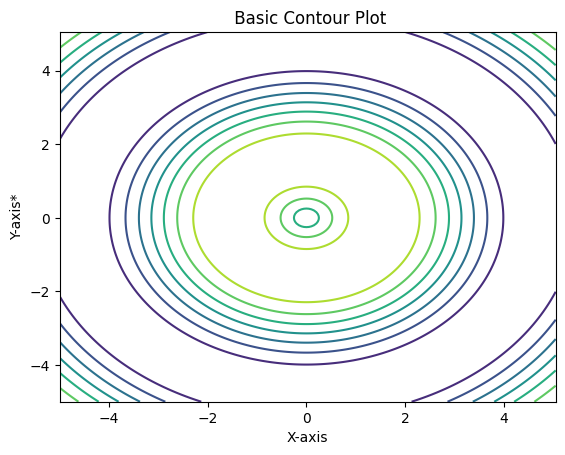

In [8]:
def func(x, y):
    return np.sin(math.sqrt(x*x+y*y))

import matplotlib.pyplot as plt
def tracer( func, x1=np.arange(-5, 5.1, 0.05), x2=np. arange(-5, 5.1, 0.05) ):
    x1, x2 = np.meshgrid(x1, x2)
    f = np.vectorize(func)
    z = f(x1,x2)
    fig = plt.figure(figsize= (7, 7) )
    axes = plt.axes (projection="3d")
    axes.plot_surface(x1, x2, z, cmap="coolwarm")
    plt.contour (x1, x2, z)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title( 'Basic Contour Plot')
    plt.show()



tracer(func)


def tracer2( func, x1=np.arange(-5, 5.1, 0.05), x2=np. arange (-5, 5.1, 0.05) ):
    x1, x2 = np.meshgrid(x1, x2)
    f = np.vectorize(func)
    z = f(x1,x2)
    plt.contour (x1, x2, z)
    plt.xlabel ('X-axis')
    plt.ylabel('Y-axis*')
    plt.title (' Basic Contour Plot' )
    plt. show ()

tracer2(func)


# Q4

In [53]:
import time


def descente_gradient_pas_optimal_quadratique(A, b, initial_x, eps=1e-15, maximum_iterations = 100):
    time1 = time.time()
    x = initial_x
    g = np.dot(A, x) - b
    d = -g
    l = [x.copy()]
    while (np.linalg.norm((np.dot(A, x)-b),2)>=eps and maximum_iterations > 0):
        t = np.dot(g.T, g) / np.dot(np.dot(g.T, A), g)        
        x = x + np.dot(t, d)
        g = np.dot(A, x) - b
        d = -g
        l.append(x.copy())
        maximum_iterations-=1

    time2 = time.time()
    temps_tot = time2 - time1
    return x, quadratic(A, b, x, order=0), temps_tot, l

# Matrice A définie positive
A = np.array([[3, 2],
              [2, 6]])

# Vecteur b
b = np.array([2, -8])

# Point initial
initial_x = np.array([0.0, 0.0])

# Appel de la fonction
x_opt_pas, f_x_opt_pas, temps_pas, points_pas = descente_gradient_pas_optimal_quadratique(A, b, initial_x)

# Résultats

print("Dernier point (x*) :", x_opt_pas)
print("Valeur de f(x*) :", f_x_opt_pas)
print("Temps d'exécution :", temps_pas, "secondes")
print("Nombre d'itérations :", len(points_pas) - 1)



Dernier point (x*) : [ 2. -2.]
Valeur de f(x*) : -10.0
Temps d'exécution : 0.0028464794158935547 secondes
Nombre d'itérations : 62


# Q5


In [54]:
import time


def gradient_conjugue_quadratique(A, b, initial_x, eps=1e-15):
    time1 = time.time()
    x = initial_x
    g = A @ x - b
    d = -g
    l = [x.copy()]
    while (np.linalg.norm((np.dot(A, x)-b),2)>=eps):
        t = -(g.T @ d) / (d.T @ A @ d)        
        x = x + t * d
        g = A @ x - b
        beta = (g.T @ A @ d)/(d.T @ A @ d)
        d = -g + beta * d
        l.append(x.copy())

    time2 = time.time()
    temps_tot = time2 - time1
    return x, quadratic(A, b, x, order=0), temps_tot, l

# Matrice A définie positive
A = np.array([[3, 2],
              [2, 6]])

# Vecteur b
b = np.array([2, -8])

# Point initial
initial_x = np.array([0.0, 0.0])

# Appel de la fonction
x_opt_con, f_x_opt_con, temps_con, points_con = gradient_conjugue_quadratique(A, b, initial_x)

# Résultats

print("Dernier point (x*) :", x_opt_con)
print("Valeur de f(x*) :", f_x_opt_con)
print("Temps d'exécution :", temps_con, "secondes")
print("Nombre d'itérations :", len(points_con) - 1)
print(points_con)

Dernier point (x*) : [ 2. -2.]
Valeur de f(x*) : -10.0
Temps d'exécution : 0.0002636909484863281 secondes
Nombre d'itérations : 2
[array([0., 0.]), array([ 0.40963855, -1.63855422]), array([ 2., -2.])]


# Q6

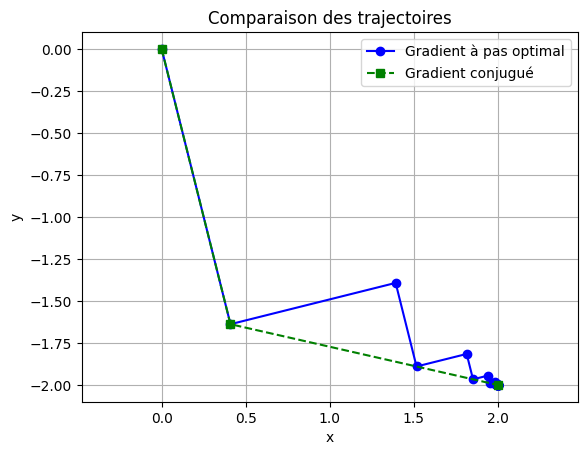

None


In [66]:

def comparaison(gd_xs, cg_xs):


    plt.plot([i[0] for i in gd_xs], [j[1] for j in gd_xs], 'o-', label='Gradient à pas optimal', color='blue')
    
    plt.plot([i[0] for i in cg_xs], [j[1] for j in cg_xs], 's--', label='Gradient conjugué', color='green')

    plt.title("Comparaison des trajectoires")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  
    plt.show()


print(comparaison(points_pas, points_con))